In [ ]:
!pip install xgboost -i https://pypi.douban.com/simple
!pip install lightgbm -i https://pypi.douban.com/simple
!pip install joblib -i https://pypi.douban.com/simple

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
#管道
from sklearn.pipeline import Pipeline
import joblib

In [2]:
df = pd.read_csv('car_sum.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8256 entries, 0 to 8255
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   车辆名称        8256 non-null   object
 1   品牌          8256 non-null   object
 2   价格          8256 non-null   object
 3   上牌时间        8256 non-null   object
 4   上市时间        8142 non-null   object
 5   表显里程        8256 non-null   object
 6   厂商          8256 non-null   object
 7   生产方式        8256 non-null   object
 8   厂商指导价(万元)   8256 non-null   object
 9   能源形式        8256 non-null   object
 10  变速箱         7960 non-null   object
 11  车身形式        8254 non-null   object
 12  整车质保        8123 non-null   object
 13  电动机总功率(kW)  8256 non-null   object
 14  过户次数        8256 non-null   object
dtypes: object(15)
memory usage: 967.6+ KB


In [3]:
def process(x):
    x1 = str(x)
    if x1 == '生产方式':
        return np.NAN
    else:
        return x1
df['生产方式'] = df['生产方式'].apply(process)
df = df.drop(['变速箱'],axis=1)
df = df.dropna(how='any',axis=0)
df.head()

,车辆名称,品牌,价格,上牌时间,上市时间,表显里程,厂商,生产方式,厂商指导价(万元),能源形式,车身形式,整车质保,电动机总功率(kW),过户次数
0,奥迪Q5 e-tron 2022款 40 e-tron 星耀型 锦衣套装,奥迪,21.78万,2022年,2022.02,O.98万公里,上汽奥迪,合资,31.25,纯电动,5门7座SUV,三年或10万公里,150,0次
1,奥迪e-tron 2021款 50 quattro 臻选型,奥迪,28.78万,2023年,2021.04,O.49万公里,一汽奥迪,合资,58.58,纯电动,5门5座SUV,三年或10万公里,230,0次
2,奥迪Q2L e-tron 2022款 Q2L e-tron 纯电智享型,奥迪,12.98万,2022年,2021.12,1.39万公里,一汽奥迪,合资,24.38,纯电动,5门5座SUV,三年或10万公里,100,1次
3,奥迪Q5 2016款 40 TFSI 技术型,奥迪,1O.9O万,2015年,2015.1,18.9万公里,一汽奥迪,合资,42.76,汽油,5门5座SUV,三年或10万公里,165,2次
4,奥迪Q2L e-tron 2019款 Q2L e-tron 纯电智酷型,奥迪,1O.9O万,2021年,2019.11,2.82万公里,一汽奥迪,合资,22.68,纯电动,5门5座SUV,三年或10万公里,100,3次


In [4]:
def pie1():
    new_df = df['品牌'].value_counts()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)

    x_data = [x for x in new_df.index][:5]
    y_data = [x for x in new_df.values][:5]
    plt.pie(y_data, labels=x_data, startangle=0, autopct='%1.2f%%')
    plt.title('最热门的Top5 品牌')
    plt.legend(x_data, loc='upper left')
    plt.tight_layout()
    plt.savefig('最热门的Top5 品牌.png')
    plt.show()


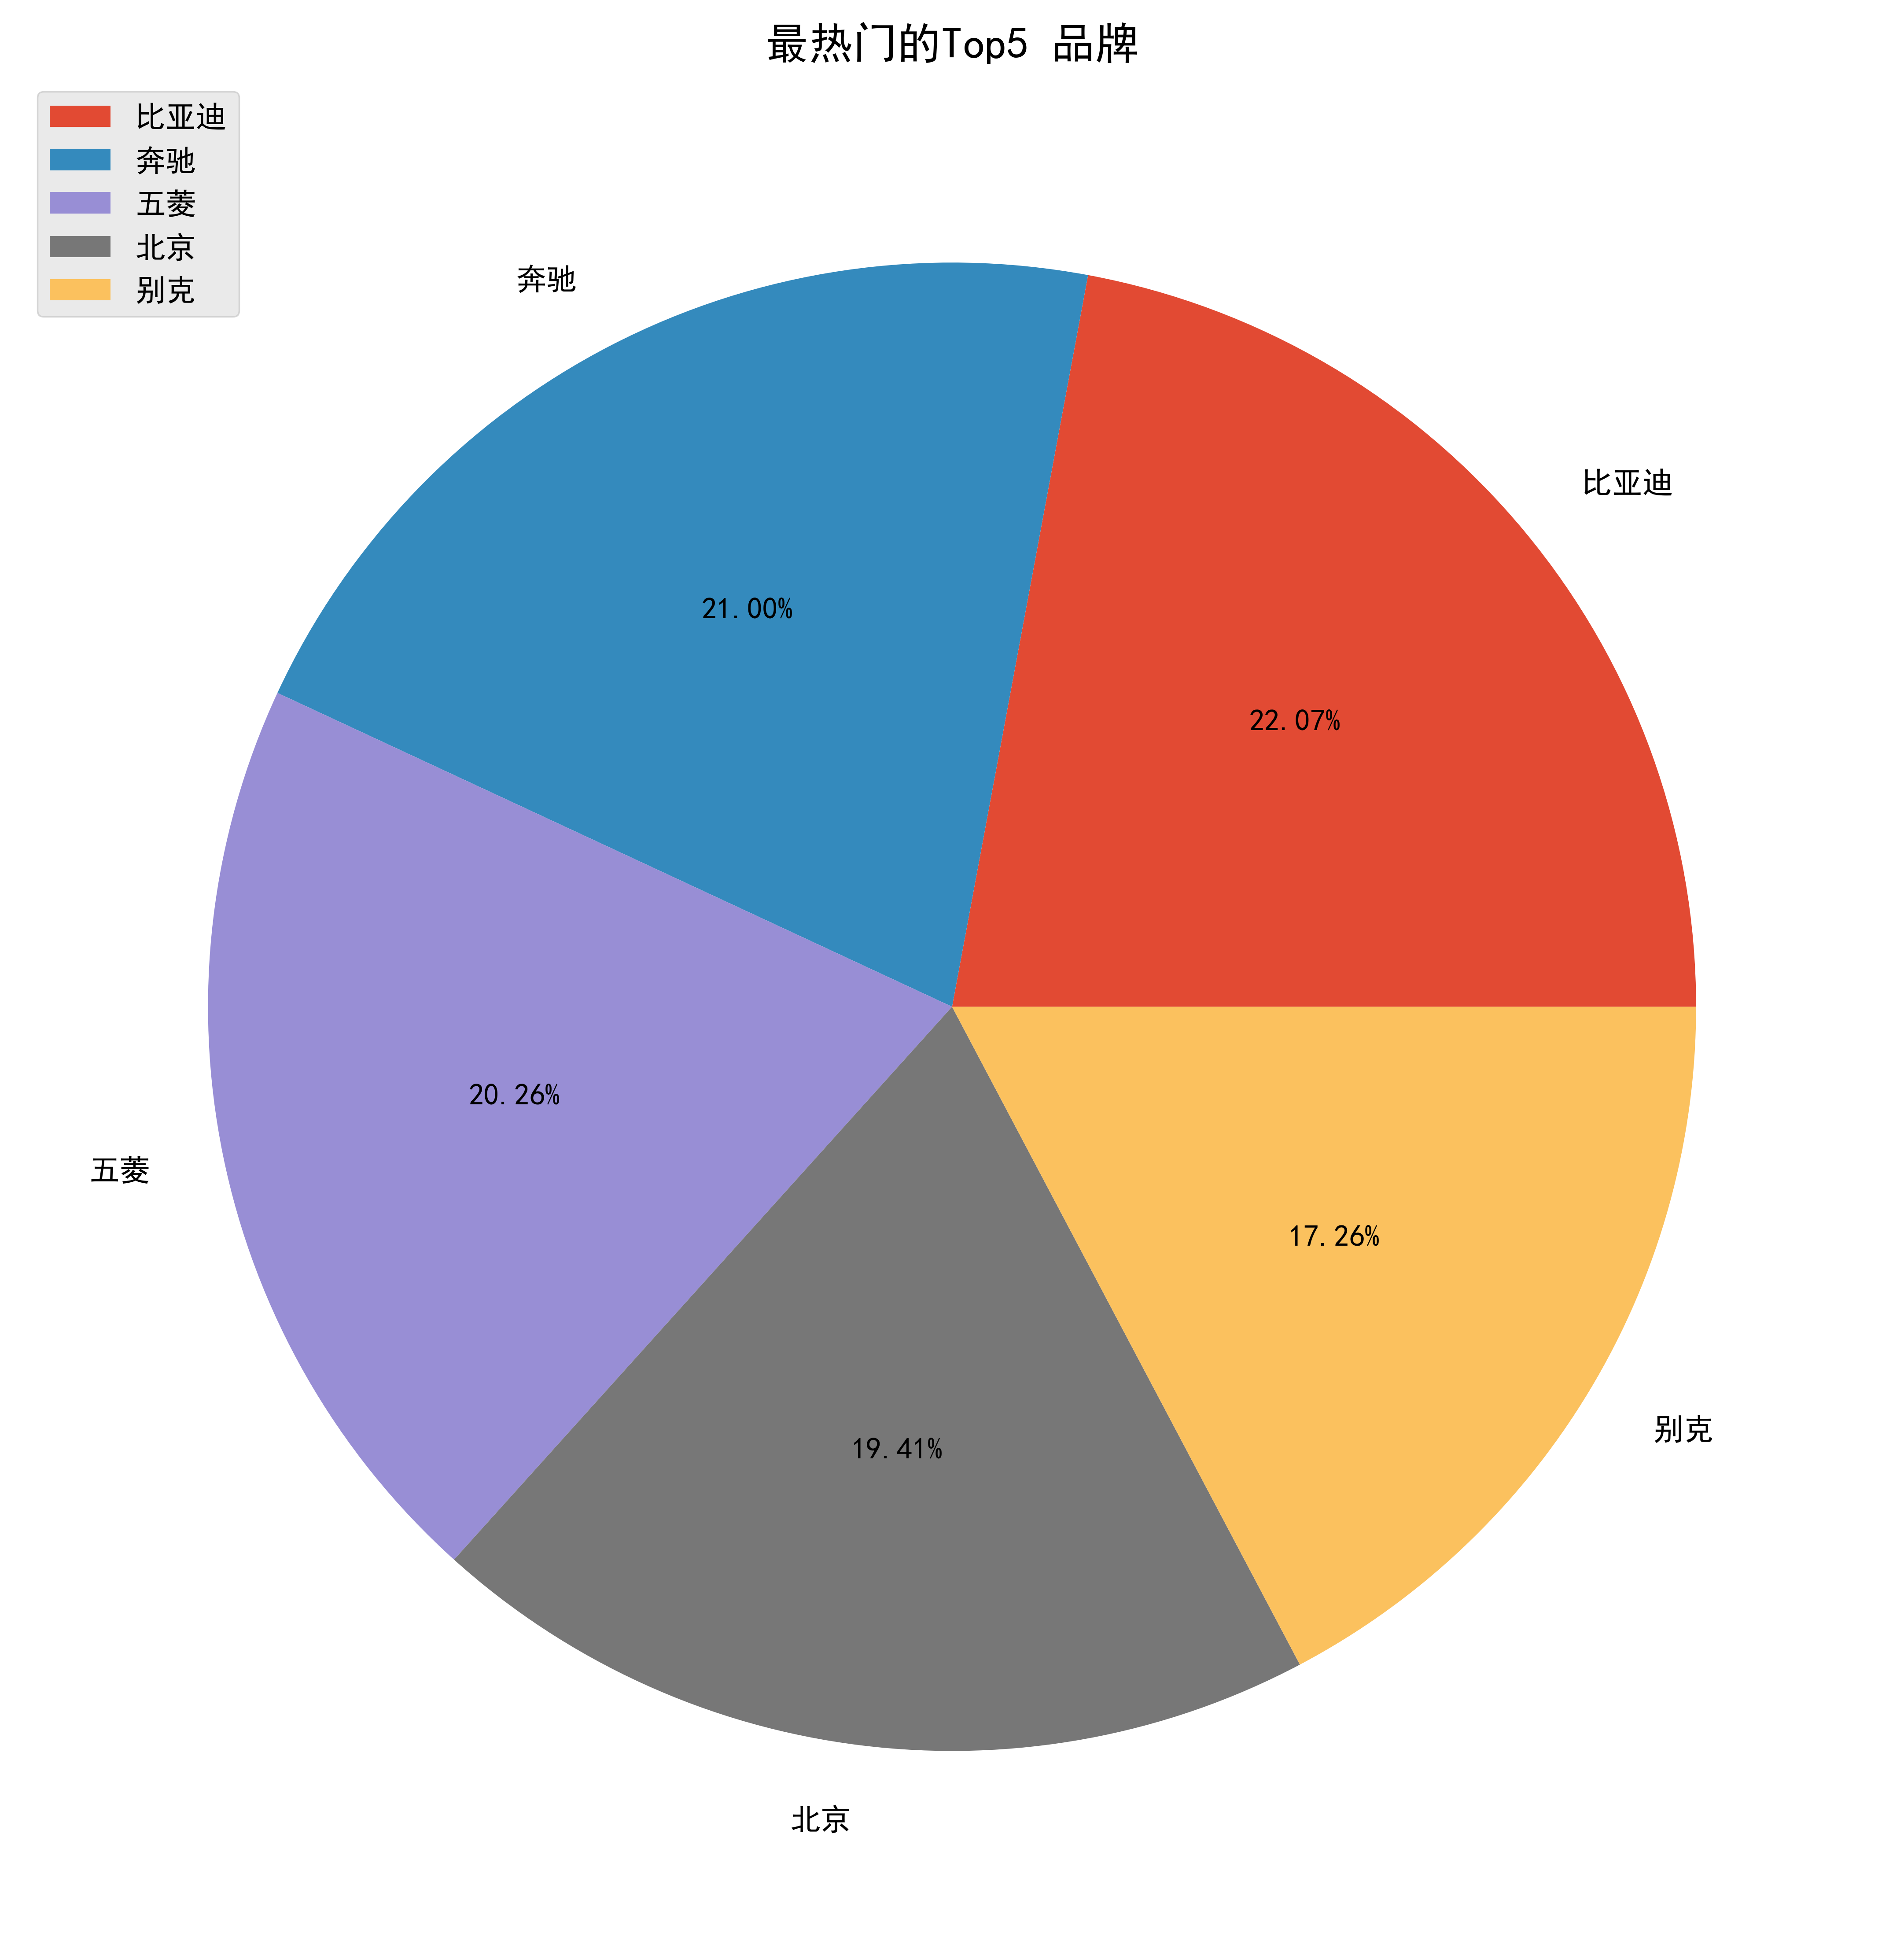

In [5]:
pie1()

In [6]:
def bar1():
    new_df = df['生产方式'].value_counts()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)
    x_data = [x for x in new_df.index]
    y_data = [x for x in new_df.values]
    plt.bar(x_data,y_data)
    plt.title("合资 VS 自主")
    plt.xlabel("数量")
    plt.ylabel("生成方式")
    plt.savefig('合资 VS 自主.png')
    plt.show()

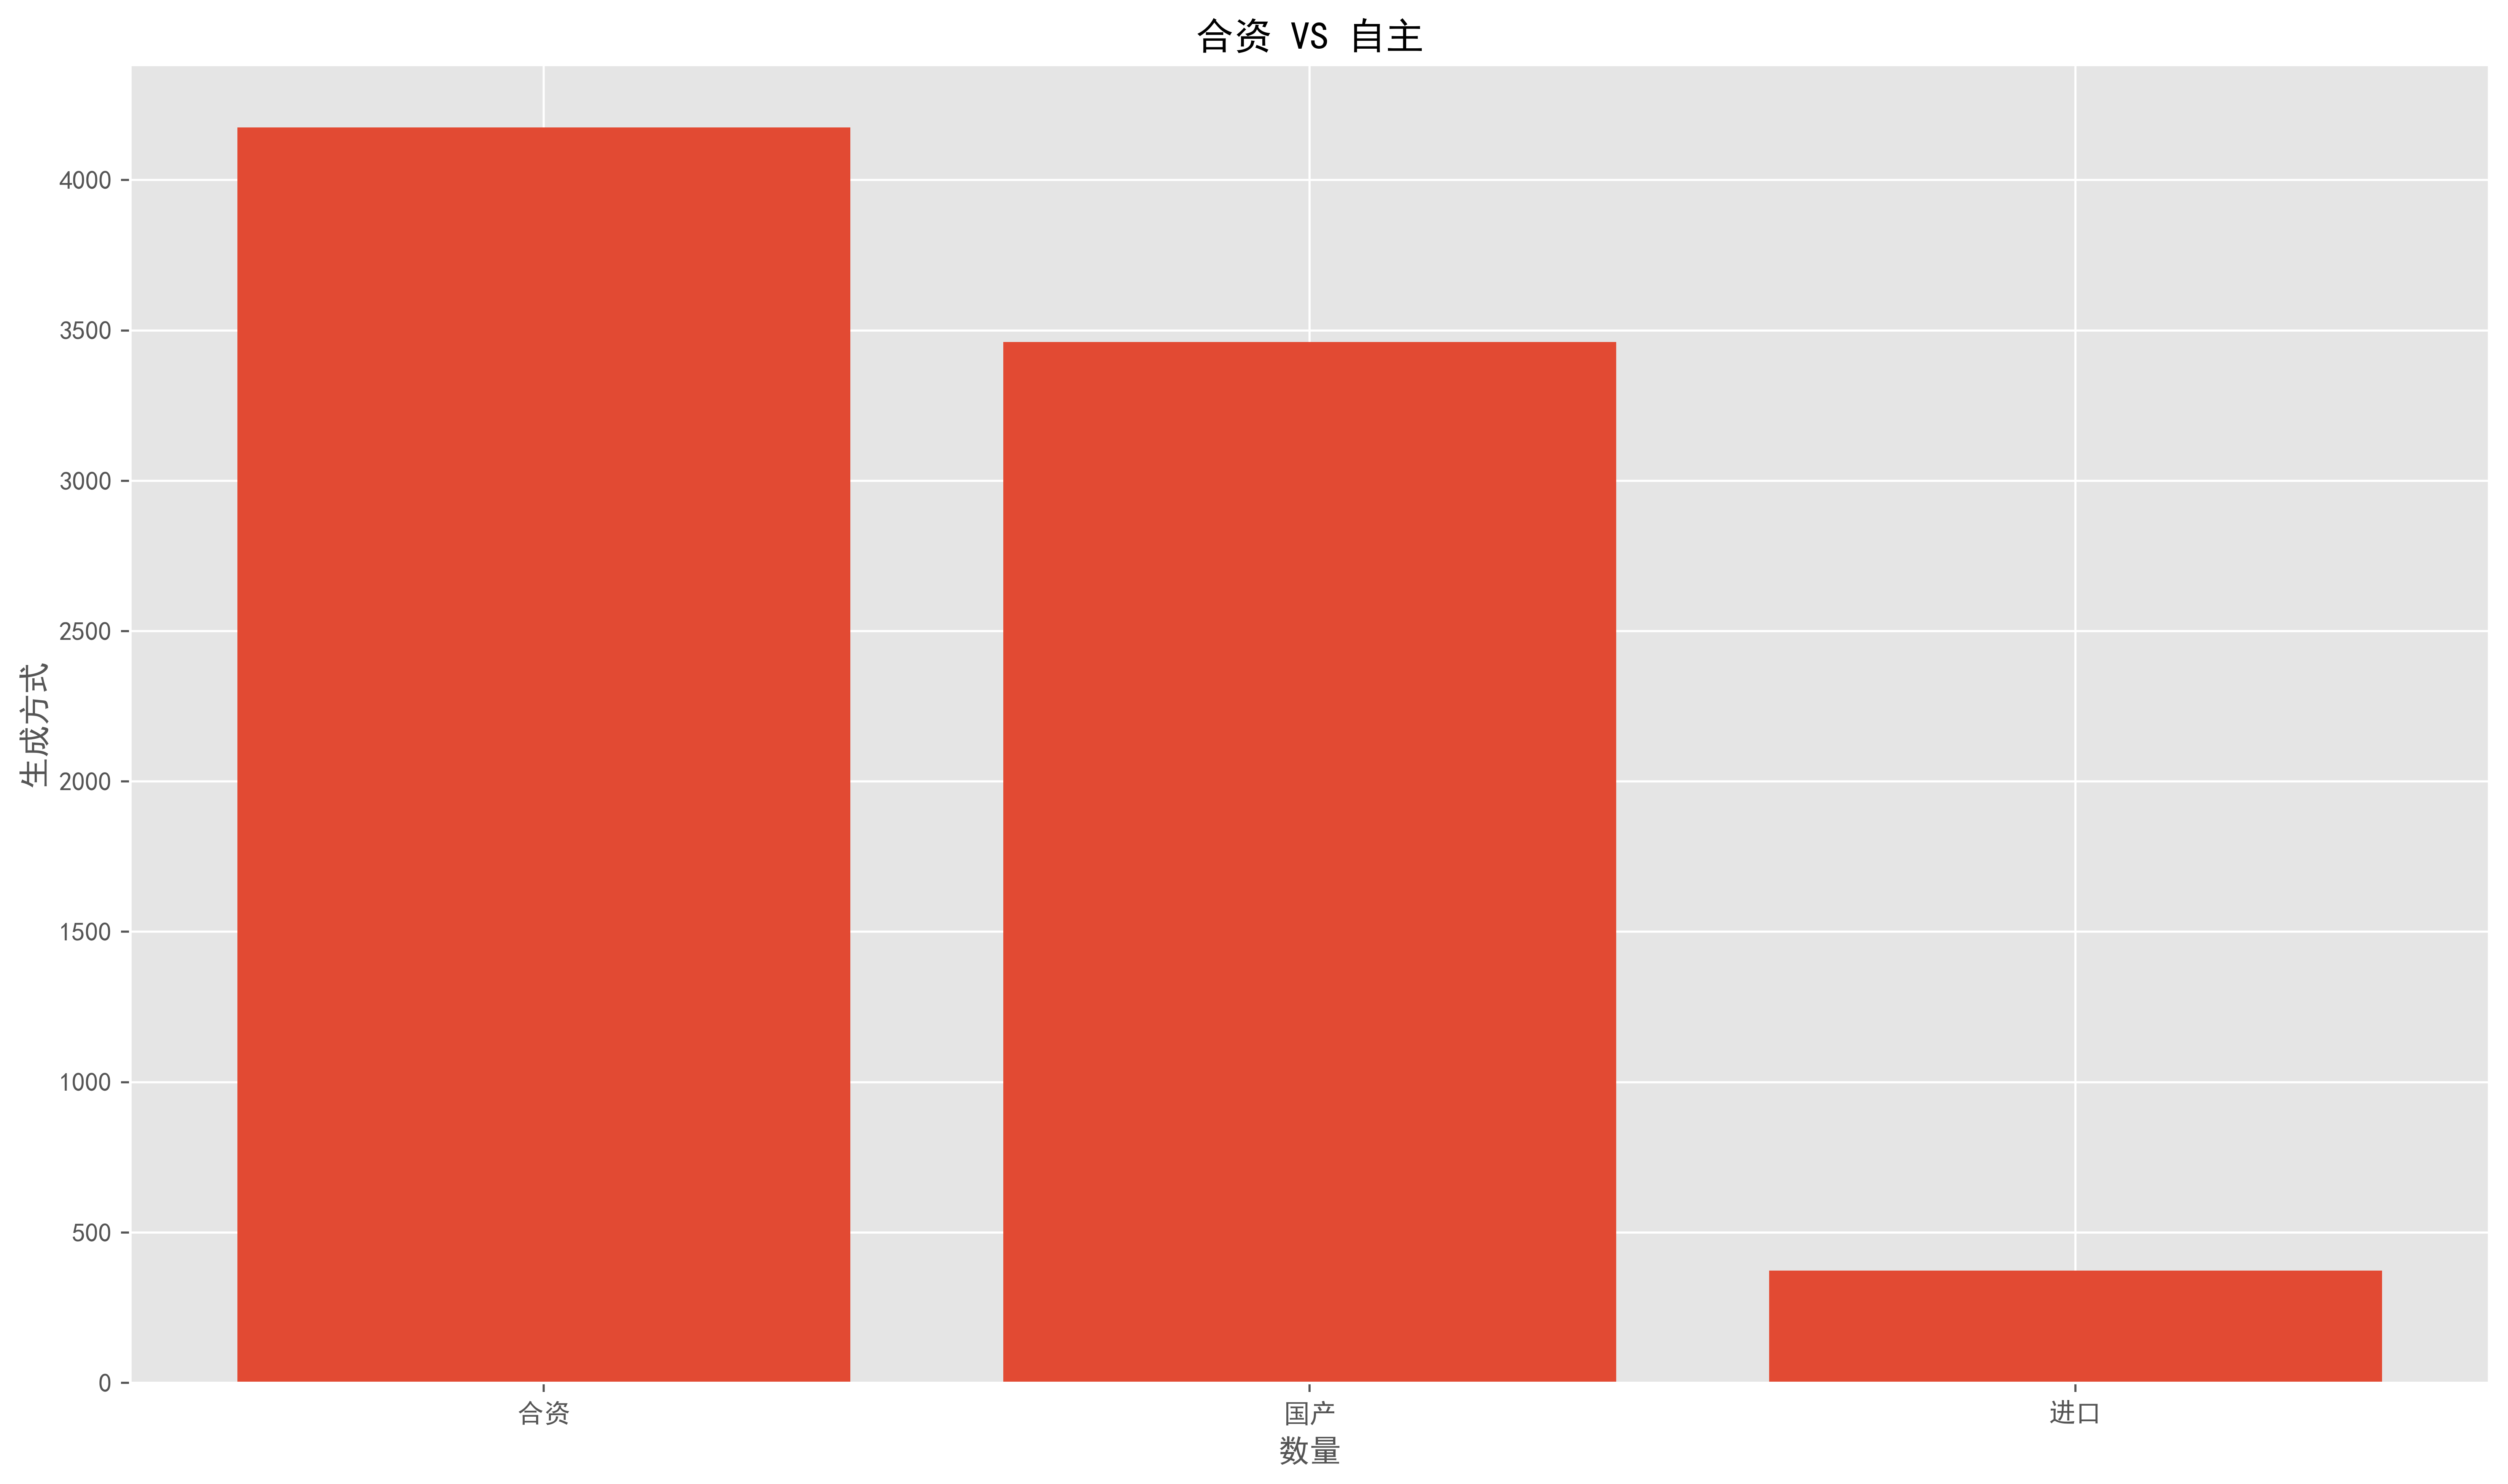

In [7]:
bar1()

In [8]:
def bar2():
    new_df = df['过户次数'].value_counts()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)

    x_data = [x for x in new_df.index]
    y_data = [x for x in new_df.values]
    plt.bar(x_data,y_data)
    plt.title("过户次数分布趋势")
    plt.xlabel("数量")
    plt.ylabel("次数")
    plt.savefig('过户次数分布趋势.png')
    plt.show()

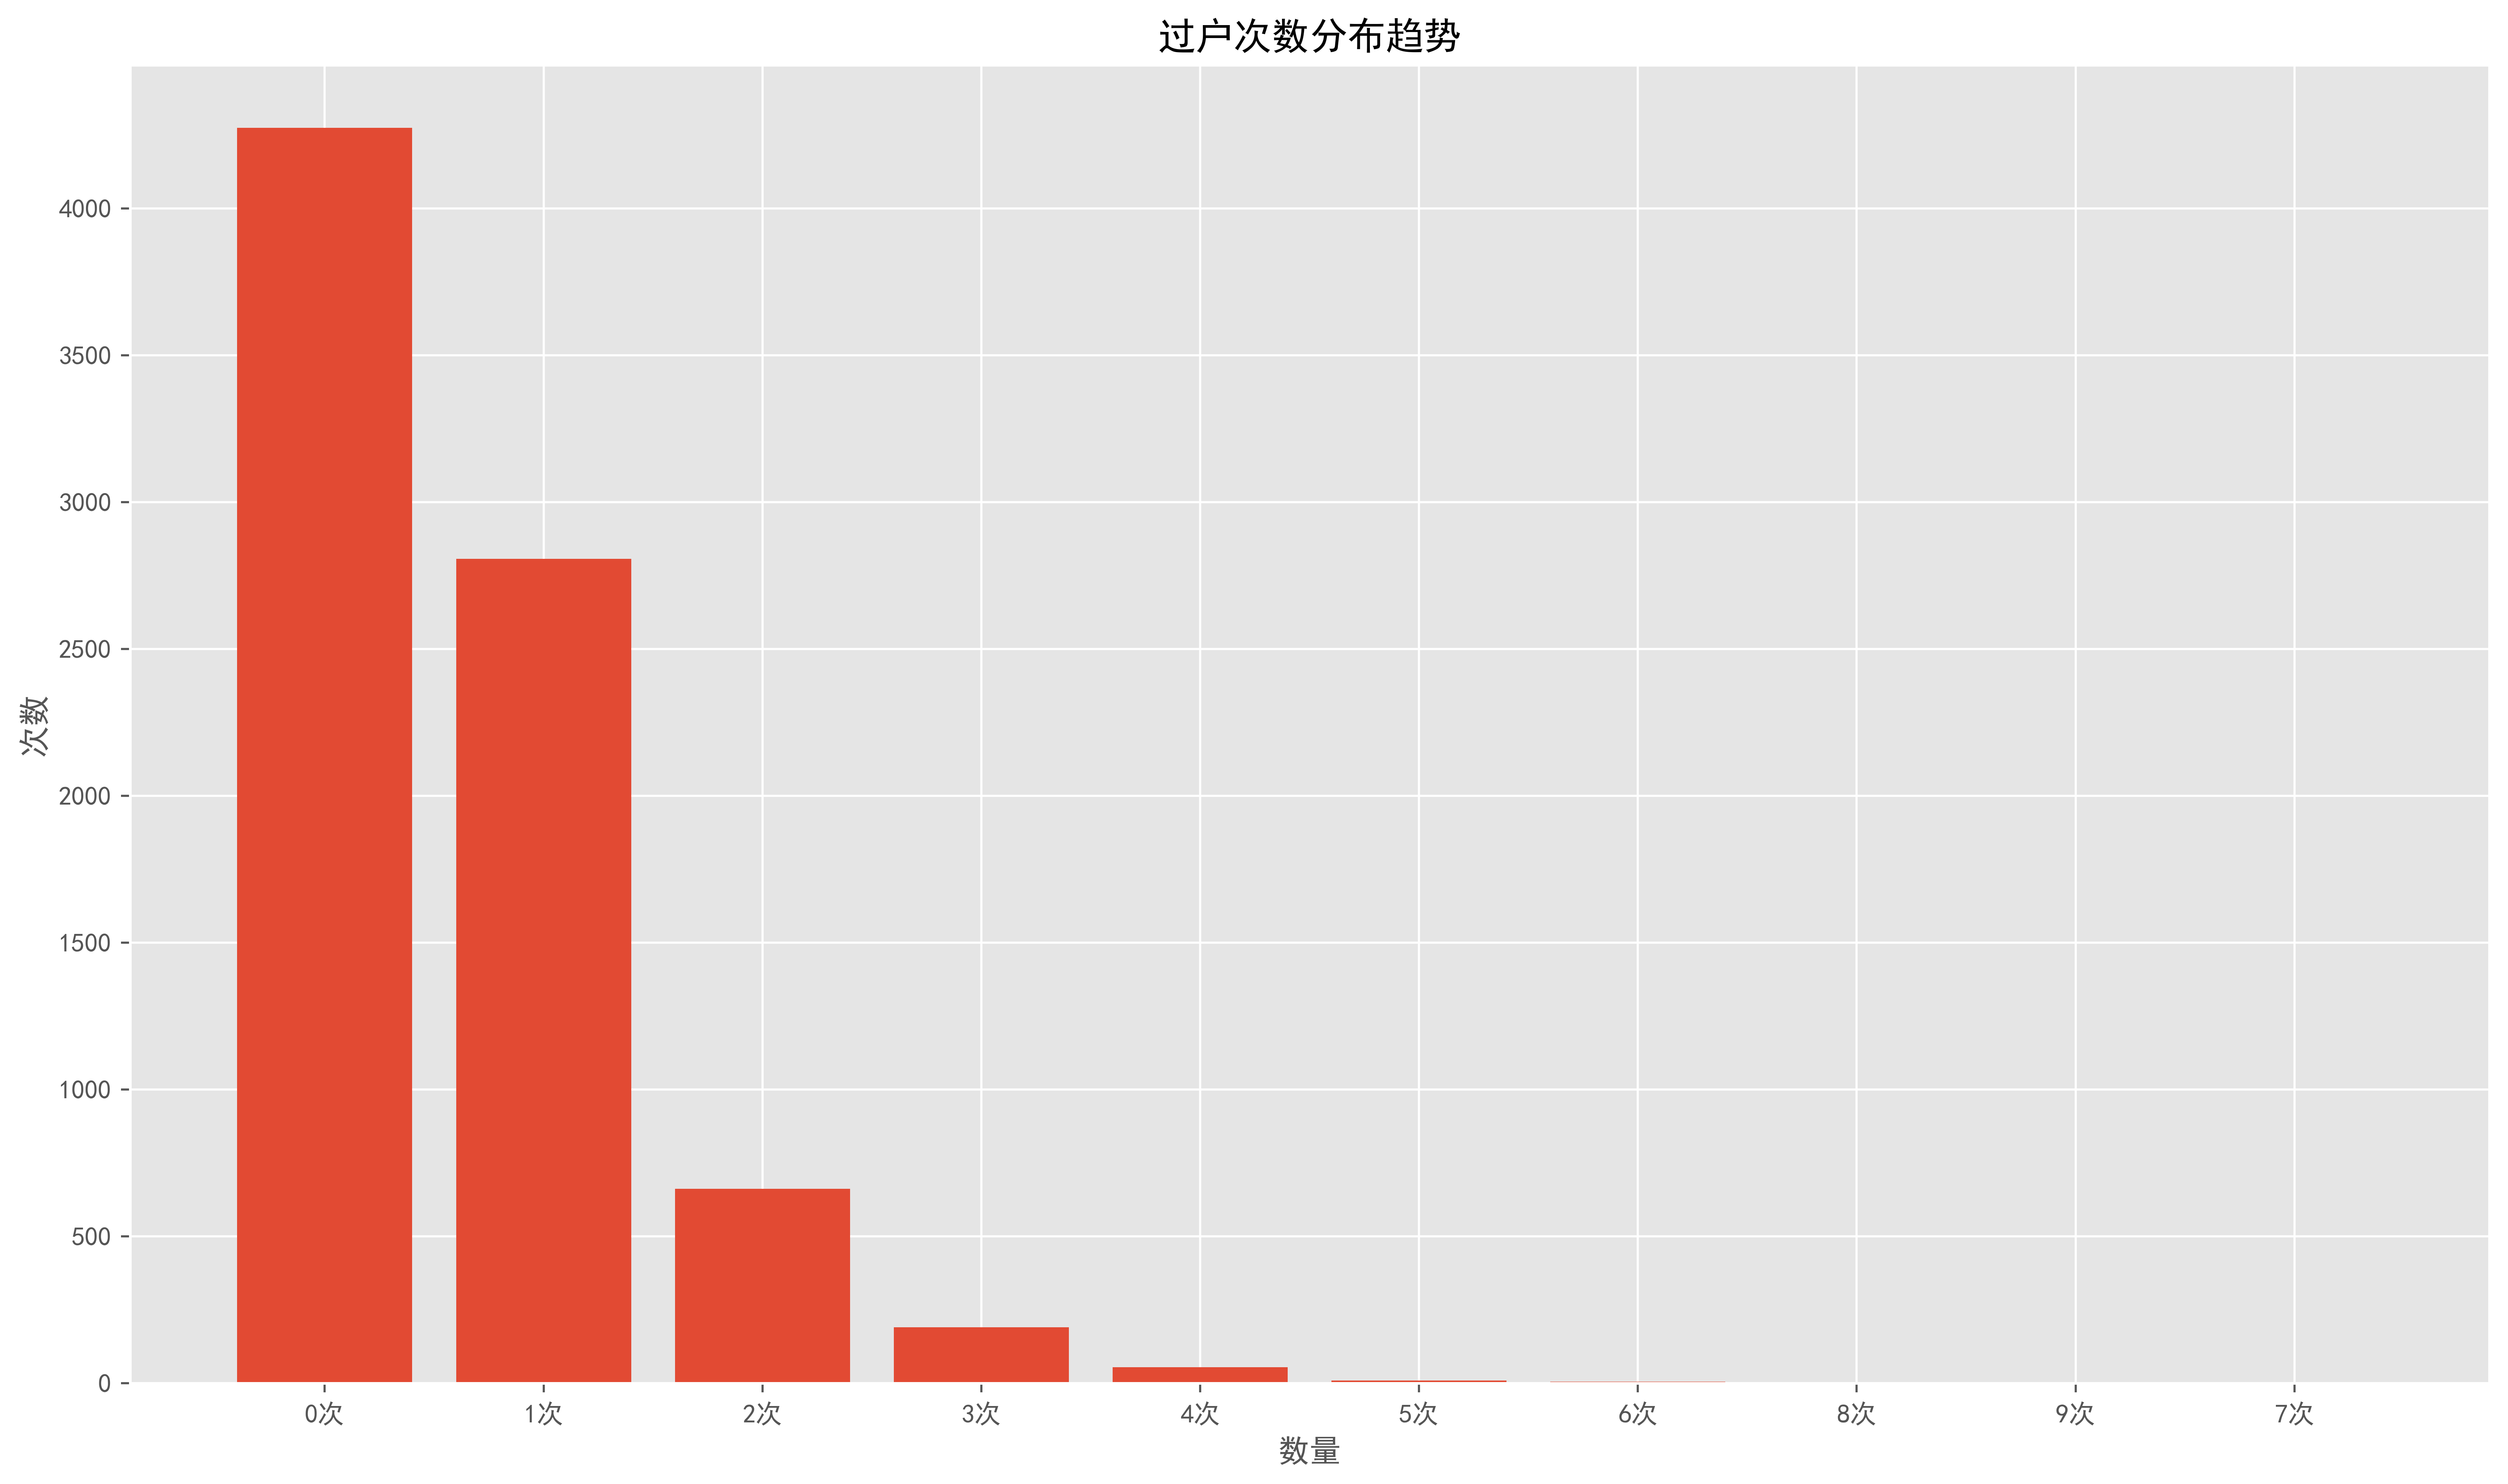

In [9]:
bar2()

In [10]:
def process2(x):
    x1 = str(x).replace('次','')
    x2 = int(x1)
    if x2 >=3:
        return '3次及以上'
    else:
        return str(x2) + "次"

df['过户次数'] = df['过户次数'].apply(process2)
df['过户次数']

0          0次
1          0次
2          1次
3          2次
4       3次及以上
        ...  
8251       1次
8252       0次
8253       0次
8254       1次
8255       0次
Name: 过户次数, Length: 8010, dtype: object

In [11]:
def process3(x):
    x1 = str(x).split("+")
    x2 = x1[0]
    if x2 != '汽油' and x2 != '纯电动':
        return '混合动力'
    else:
        return x2

df['能源形式'] = df['能源形式'].apply(process3)
df['能源形式']

0       纯电动
1       纯电动
2       纯电动
3        汽油
4       纯电动
       ... 
8251     汽油
8252     汽油
8253     汽油
8254     汽油
8255     汽油
Name: 能源形式, Length: 8010, dtype: object

In [12]:
def pie2():
    new_df = df['能源形式'].value_counts()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)

    x_data = [x for x in new_df.index][:5]
    y_data = [x for x in new_df.values][:5]
    plt.pie(y_data, labels=x_data, startangle=0, autopct='%1.2f%%')
    plt.title('能源形式 占比')
    plt.legend(x_data, loc='upper left')
    plt.tight_layout()
    plt.savefig('能源形式 占比.png')
    plt.show()


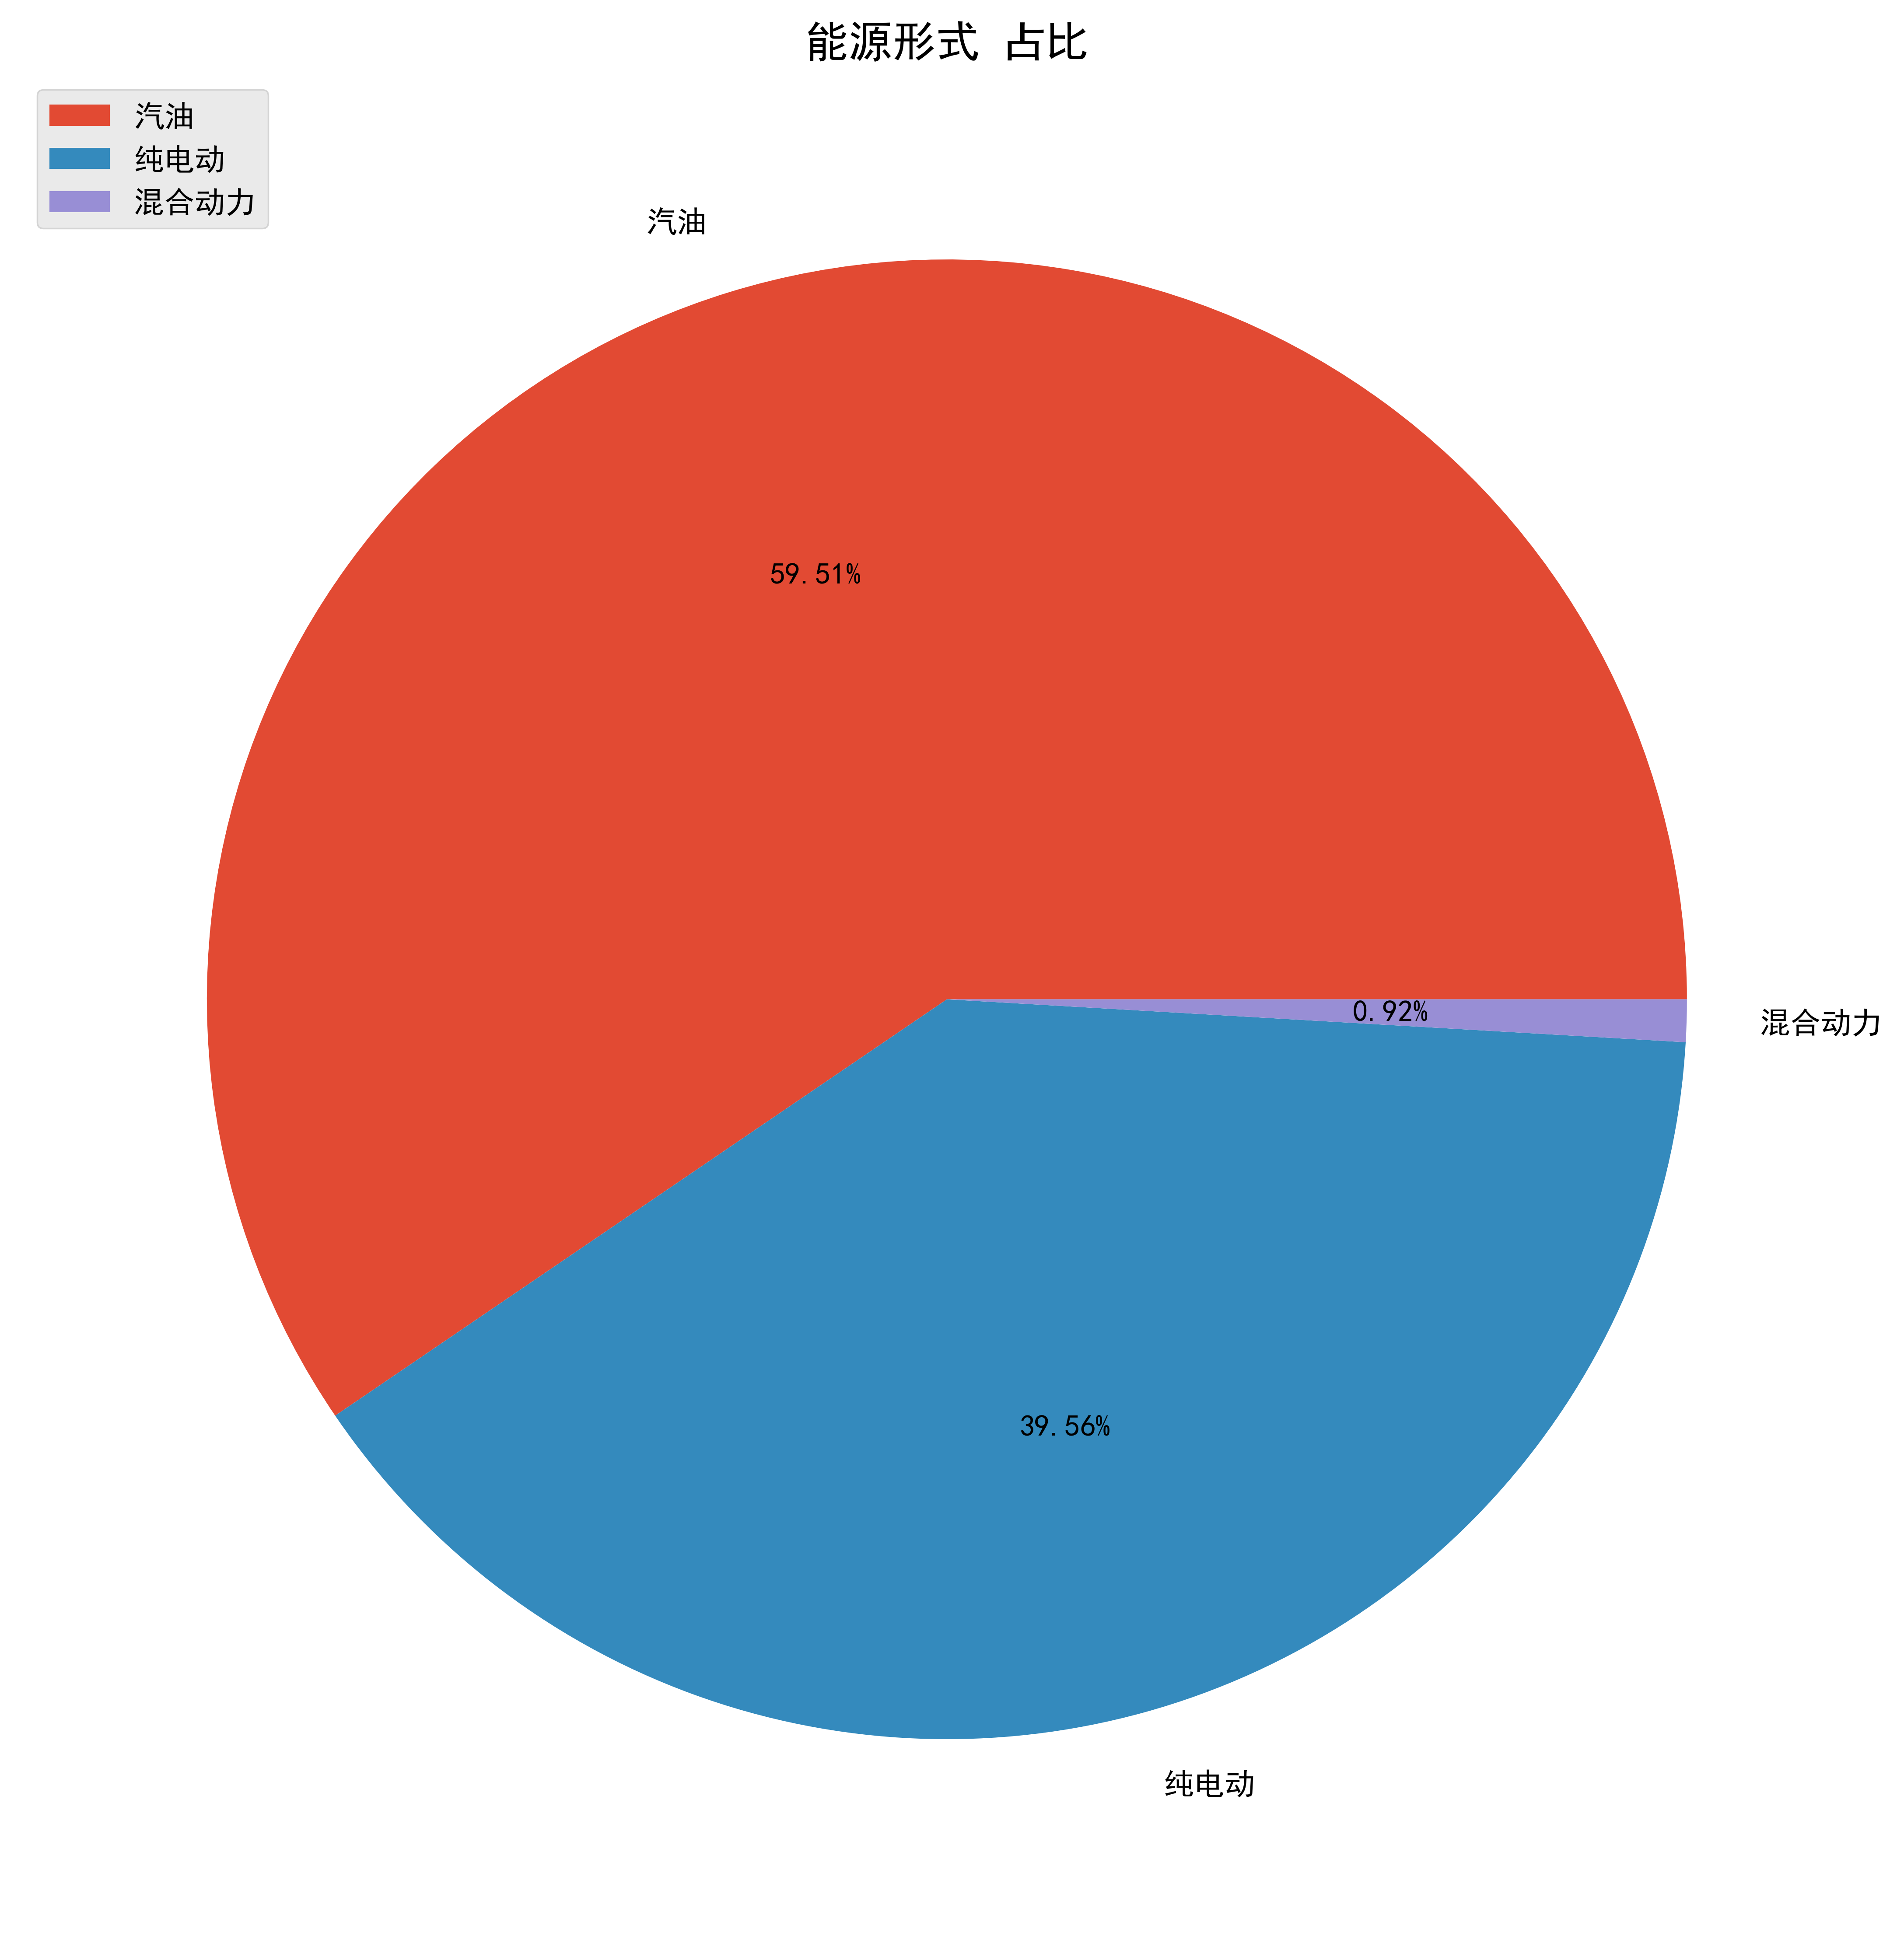

In [13]:
pie2()

In [14]:
def line1():
    new_df = df['上牌时间'].value_counts()
    new_df = new_df.sort_index()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)

    x_data = [x for x in new_df.index]
    y_data = [x for x in new_df.values]
    plt.plot(x_data,y_data,color='#b82410',label='上牌时间')
    plt.title('上牌时间分布趋势')
    plt.legend(x_data, loc='upper left')
    plt.tight_layout()
    plt.savefig('上牌时间分布趋势.png')
    plt.show()

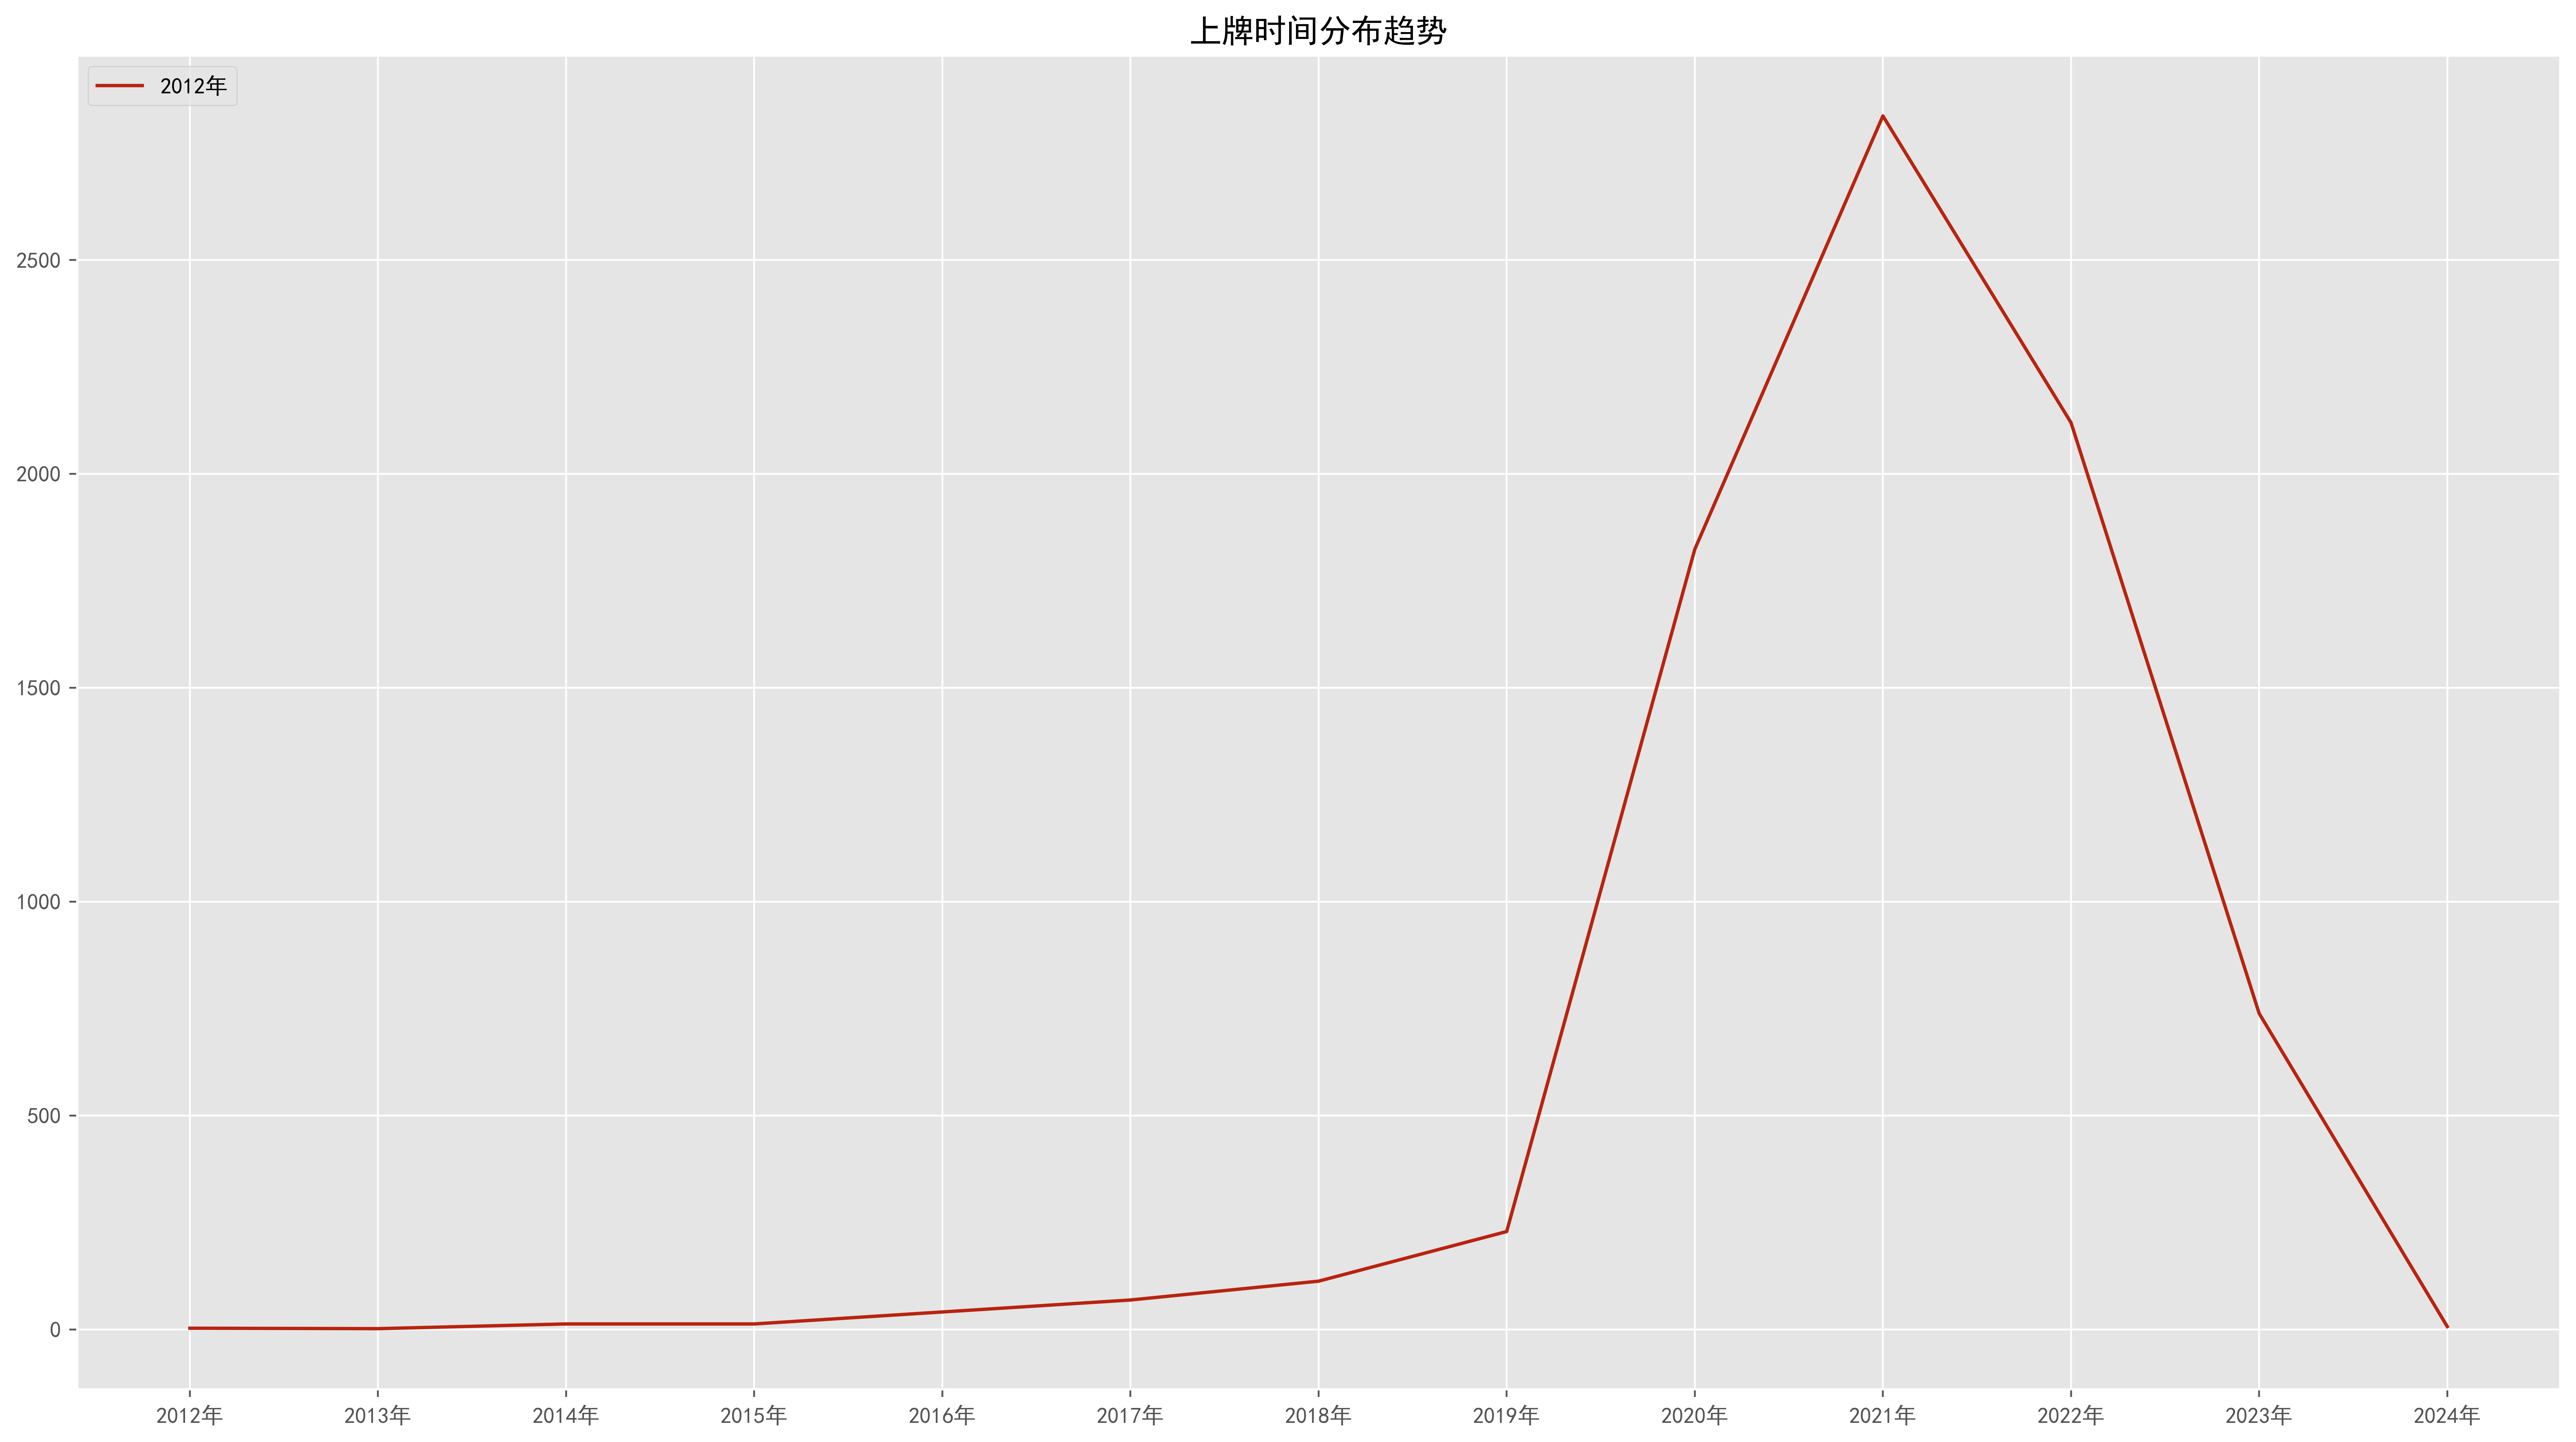

In [15]:
line1()

In [19]:
def process4(x):
    try:
        x1 = str(x).replace('万公里','').replace('O','0').strip(" ")
        x1 = x1.strip("\n")
        x1 = x1.strip("\t")
        x1 = x1.strip("\r")
        x1 = float(x1)
        return x1
    except:
        return np.NAN
def process5(x):
    try:
        x1 = str(x).replace('万','').replace('O','0').strip(" ")
        x1 = x1.strip("\n")
        x1 = x1.strip("\t")
        x1 = x1.strip("\r")
        x1 = float(x1)
        return x1
    except:
        return np.NAN
def process6(x):
    x1 = str(x).replace('年','')
    return int(x1)

In [21]:
df['表显里程'] = df['表显里程'].apply(process4)
df['价格'] = df['价格'].apply(process5)
df['厂商指导价(万元)'] = df['厂商指导价(万元)'].apply(process5)
df['上牌时间'] = df['上牌时间'].apply(process6)
df = df.dropna(how='any',axis=0)
df.head()

,车辆名称,品牌,价格,上牌时间,上市时间,表显里程,厂商,生产方式,厂商指导价(万元),能源形式,车身形式,整车质保,电动机总功率(kW),过户次数
0,奥迪Q5 e-tron 2022款 40 e-tron 星耀型 锦衣套装,奥迪,21.78,2022,2022.02,0.98,上汽奥迪,合资,31.25,纯电动,5门7座SUV,三年或10万公里,150,0次
1,奥迪e-tron 2021款 50 quattro 臻选型,奥迪,28.78,2023,2021.04,0.49,一汽奥迪,合资,58.58,纯电动,5门5座SUV,三年或10万公里,230,0次
2,奥迪Q2L e-tron 2022款 Q2L e-tron 纯电智享型,奥迪,12.98,2022,2021.12,1.39,一汽奥迪,合资,24.38,纯电动,5门5座SUV,三年或10万公里,100,1次
3,奥迪Q5 2016款 40 TFSI 技术型,奥迪,10.90,2015,2015.1,18.90,一汽奥迪,合资,42.76,汽油,5门5座SUV,三年或10万公里,165,2次
4,奥迪Q2L e-tron 2019款 Q2L e-tron 纯电智酷型,奥迪,10.90,2021,2019.11,2.82,一汽奥迪,合资,22.68,纯电动,5门5座SUV,三年或10万公里,100,3次及以上


In [22]:
le = LabelEncoder()
df['生产方式'] = le.fit_transform(df['生产方式'])
df['过户次数'] = le.fit_transform(df['过户次数'])
df['能源形式'] = le.fit_transform(df['能源形式'])
df['整车质保'] = le.fit_transform(df['整车质保'])
df['车身形式'] = le.fit_transform(df['车身形式'])
df['厂商'] = le.fit_transform(df['厂商'])
df.head()

,车辆名称,品牌,价格,上牌时间,上市时间,表显里程,厂商,生产方式,厂商指导价(万元),能源形式,车身形式,整车质保,电动机总功率(kW),过户次数
0,奥迪Q5 e-tron 2022款 40 e-tron 星耀型 锦衣套装,奥迪,21.78,2022,2022.02,0.98,8,0,31.25,2,31,2,150,0
1,奥迪e-tron 2021款 50 quattro 臻选型,奥迪,28.78,2023,2021.04,0.49,4,0,58.58,2,21,2,230,0
2,奥迪Q2L e-tron 2022款 Q2L e-tron 纯电智享型,奥迪,12.98,2022,2021.12,1.39,4,0,24.38,2,21,2,100,1
3,奥迪Q5 2016款 40 TFSI 技术型,奥迪,10.90,2015,2015.1,18.90,4,0,42.76,0,21,2,165,2
4,奥迪Q2L e-tron 2019款 Q2L e-tron 纯电智酷型,奥迪,10.90,2021,2019.11,2.82,4,0,22.68,2,21,2,100,3


In [23]:
def box_plot():
    data1 = list(df['价格'])
    data2 = list(df['表显里程'])
    data3 = list(df['厂商指导价(万元)'])
    data = [data2,data1,data3]
    y = ['表显里程','价格','厂商指导价(万元)']

    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 设置箱线图的参数
    fig, ax = plt.subplots()
    ax.boxplot(data)

    # 设置x轴标签
    plt.xticks([1, 2, 3], y)

    # 设置y轴标签
    plt.ylabel('单位:/万')

    # 设置标题
    plt.title('箱线图数据展示')

    plt.savefig('箱线图数据展示.png')

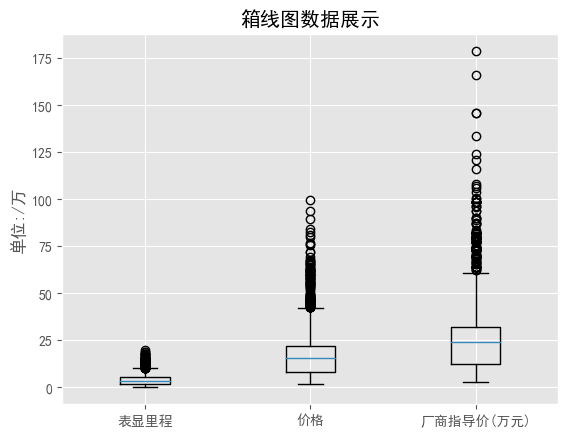

In [24]:
box_plot()

In [25]:
def pair_plot():
    data = pd.DataFrame()
    data['价格'] = df['价格']
    data['厂商指导价(万元)'] = df['厂商指导价(万元)']
    data['表显里程'] = df['表显里程']
    # 使用seaborn绘制多变量回归关系图
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16,9),dpi=500)
    sns.pairplot(data, kind='reg')
    plt.savefig('多变量回归关系图.png')

<Figure size 8000x4500 with 0 Axes>

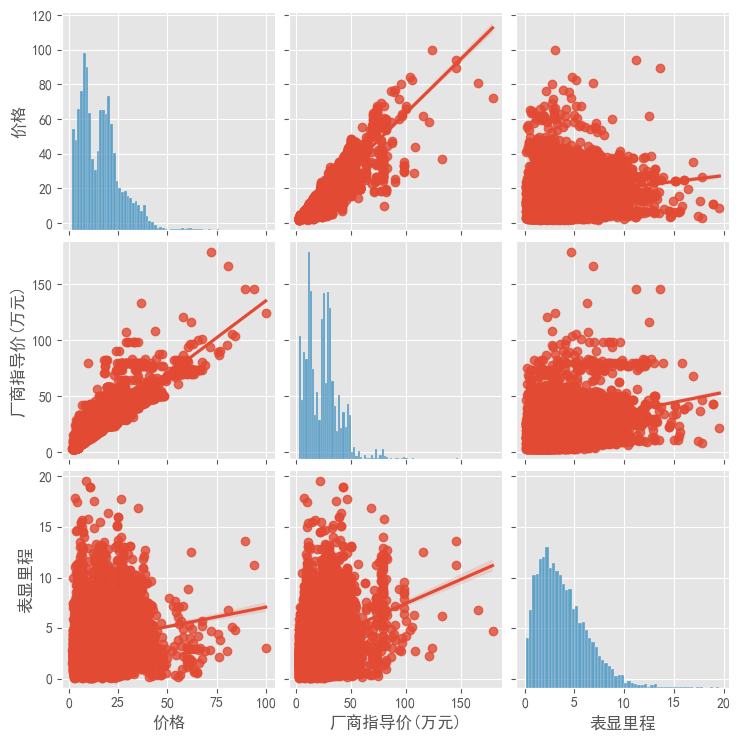

In [26]:
pair_plot()

In [27]:
df = df.drop(['车辆名称','品牌','上市时间','电动机总功率(kW)'],axis=1)
df.head()

,价格,上牌时间,表显里程,厂商,生产方式,厂商指导价(万元),能源形式,车身形式,整车质保,过户次数
0,21.78,2022,0.98,8,0,31.25,2,31,2,0
1,28.78,2023,0.49,4,0,58.58,2,21,2,0
2,12.98,2022,1.39,4,0,24.38,2,21,2,1
3,10.90,2015,18.90,4,0,42.76,0,21,2,2
4,10.90,2021,2.82,4,0,22.68,2,21,2,3


In [28]:
def hea_tmap():
    data = df
    # 使用corr函数计算相关性矩阵
    correlation_matrix = data.corr()
    plt.style.use('ggplot')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize=(16, 9), dpi=500)
    # 使用seaborn库绘制相关性矩阵的热力图
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

    # 显示图形
    plt.savefig('相关性矩阵.png')

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6248\3560385312.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('相关性矩阵.png')
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


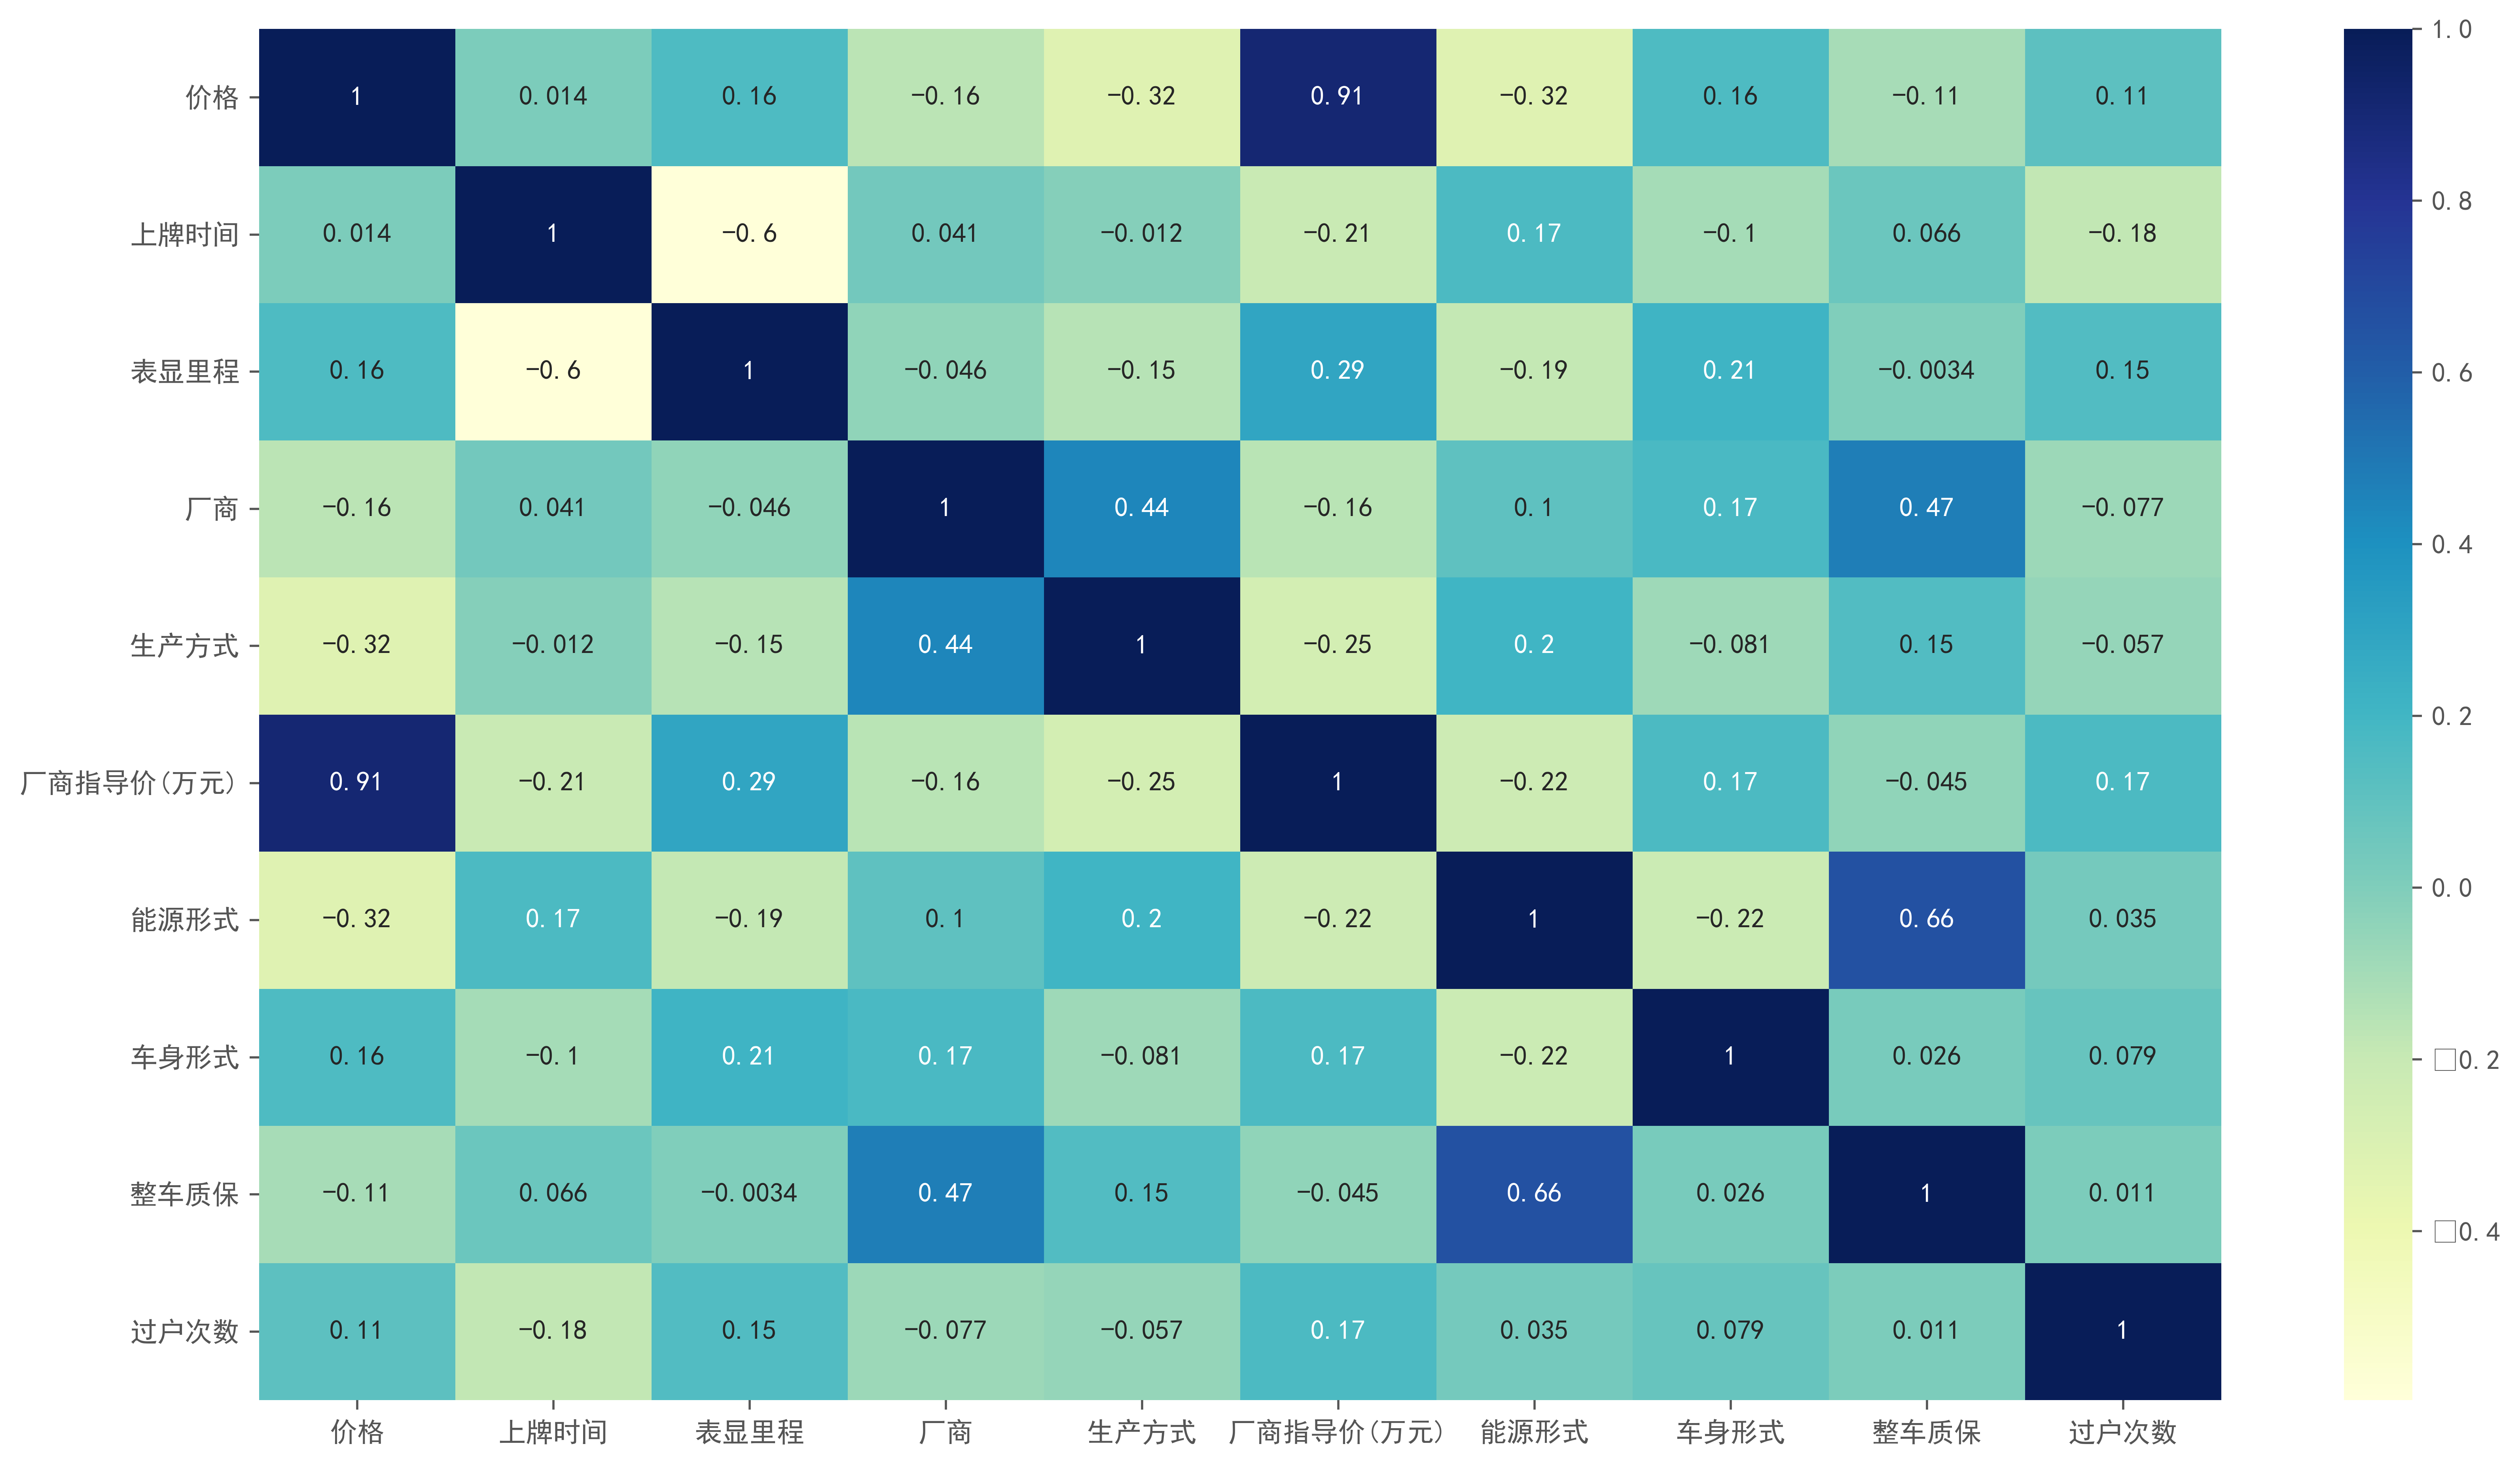

In [29]:
hea_tmap()

In [30]:
def Modeling_():
    data = df[['上牌时间','表显里程','厂商','生产方式','厂商指导价(万元)','能源形式','车身形式','整车质保','过户次数']]
    targe = df['价格']
    # 分割训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(data, targe, test_size=0.3, random_state=42)
    # 使用StandardScaler对数据进行标准化
    scaler = StandardScaler()
    X_train_score = scaler.fit_transform(X_train)
    X_test_score = scaler.fit_transform(X_test)

    # 构造各种回归模型
    regressors = [
        GradientBoostingRegressor(random_state=10),
        RandomForestRegressor(random_state=10),
        xgb.XGBRegressor(random_state=10),
        lgb.LGBMRegressor(random_state=10)
    ]

    # 回归模型名称
    regressor_names = [
        'GBDT',
        'Random Forest',
        'XGBoost',
        'LightGBM'
    ]

    # 回归模型参数
    regressor_param_grid = [
        {'GBDT__n_estimators': [50, 100, 200]},
        {'Random Forest__n_estimators': [50, 100, 200]},
        {'XGBoost__n_estimators': [50, 100, 200]},
        {'LightGBM__n_estimators': [50, 100, 200]}
    ]

    # 对具体的回归模型进行GridSearchCV参数调优
    def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y,param_grid):
        response = {}
        # 创建 GridSearchCV 对象，并设置参数
        gridsearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_absolute_error')
        # 在训练集上进行网格搜索
        search = gridsearch.fit(train_x, train_y)
        print("GridSearch最优参数：", search.best_params_)
        # 在测试集上进行预测
        predict_y = gridsearch.predict(test_x)
        # 计算评估指标
        response['predict_y'] = predict_y
        response['mae'] = mean_absolute_error(test_y, predict_y)
        response['explained_variance'] = explained_variance_score(test_y, predict_y)
        response['r2'] = r2_score(test_y, predict_y)
        return response

    mae_scores = []
    explained_variance_scores = []
    r2_scores = []
    # 遍历每个回归模型及其对应的参数网格
    for model, model_name, model_param_grid in zip(regressors, regressor_names, regressor_param_grid):
        pipeline = Pipeline([
            (model_name, model)
        ])
        # 对当前回归模型进行参数调优
        result = GridSearchCV_work(pipeline, X_train_score, y_train, X_test_score, y_test,model_param_grid)
        # 记录评估指标
        mae_scores.append(result['mae'])
        explained_variance_scores.append(result['explained_variance'])
        r2_scores.append(result['r2'])

    # 可视化指标
    x_labels = regressor_names
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # 第一个小图：MAE
    axes[0].bar(x_labels, mae_scores, label='MAE', color='blue')
    axes[0].set_xlabel('Regressor')
    axes[0].set_ylabel('MAE Score')
    axes[0].set_title('MAE Comparison')

    # 第二个小图：Explained Variance
    axes[1].bar(x_labels, explained_variance_scores, label='Explained Variance', color='orange')
    axes[1].set_xlabel('Regressor')
    axes[1].set_ylabel('Explained Variance Score')
    axes[1].set_title('Explained Variance Comparison')

    # 第三个小图：R2 Score
    axes[2].bar(x_labels, r2_scores, label='R2 Score', color='green')
    axes[2].set_xlabel('Regressor')
    axes[2].set_ylabel('R2 Score')
    axes[2].set_title('R2 Score Comparison')

    # 调整子图之间的间距
    plt.tight_layout()
    # 保存图表
    plt.savefig('regression_comparison_separate.png')

    # 找到效果最好的模型
    best_model_index = np.argmax(r2_scores)
    best_model_name = regressor_names[best_model_index]
    best_model = regressors[best_model_index]
    print("最好的回归模型是：", best_model_name)

    # 保存相关指标数据
    result_df = pd.DataFrame({
        'Regressor': regressor_names,
        'MAE': mae_scores,
        'Explained Variance': explained_variance_scores,
        'R2 Score': r2_scores
    })
    result_df.to_csv('regression_metrics.csv', index=False,encoding='utf-8-sig')

    # 保存效果最好的模型
    clf = best_model.fit(X_train_score, y_train)
    predict_y = clf.predict(X_test_score)
    print(predict_y)
    joblib.dump(best_model, 'best_regression_model.pkl')

GridSearch最优参数： {'GBDT__n_estimators': 200}
GridSearch最优参数： {'Random Forest__n_estimators': 200}
GridSearch最优参数： {'XGBoost__n_estimators': 200}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 4416, number of used features: 9
[LightGBM] [Info] Start training from score 16.380863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 4416, number of used features: 9
[LightGBM] [Info] Start training from score 16.350263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

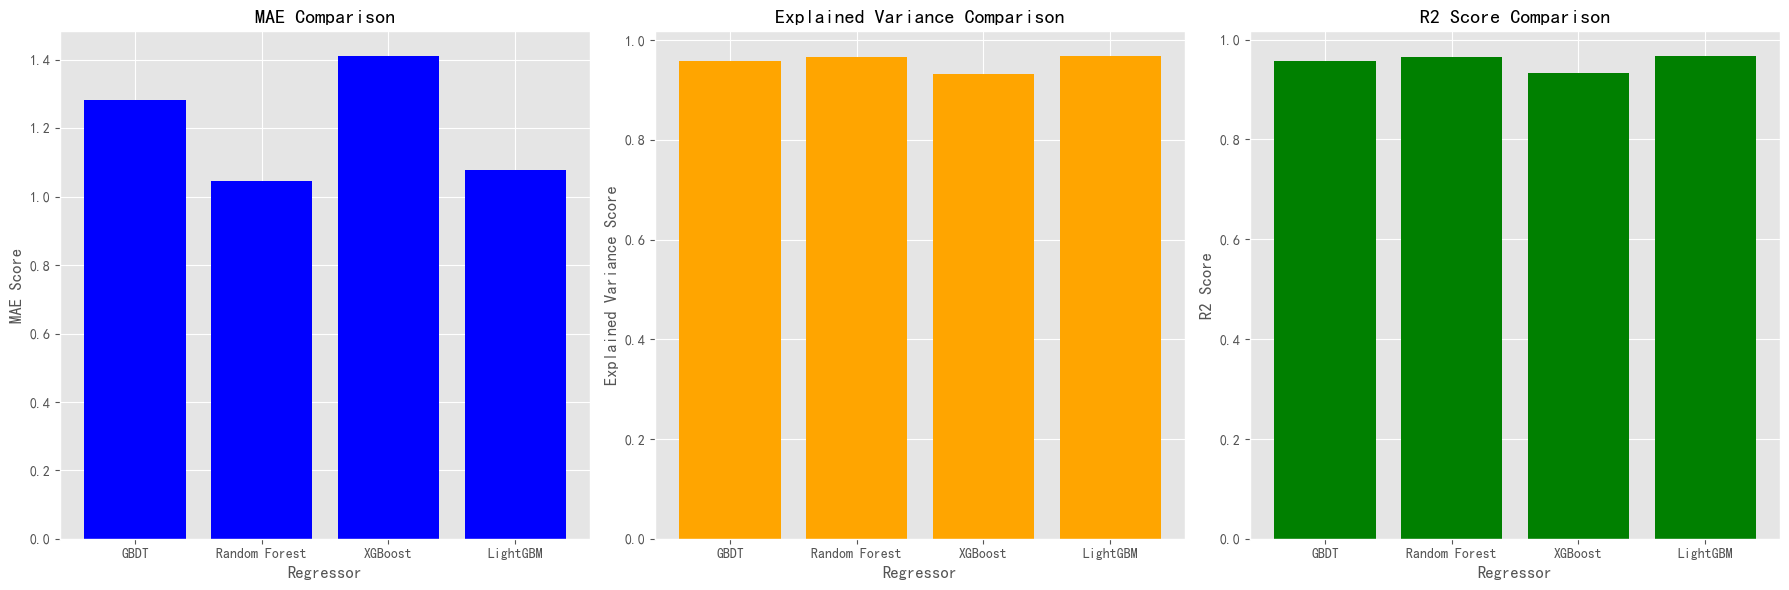

In [31]:
Modeling_()